# CMU Data Science Club Sustainability Datathon

**Team Name:** andrewID of team member submitting (only 1 member submits for entire team)

**Names:** Stanley Ou, Andy Ouyang, Joyce Lam

**Andrew IDs:** stanleyo, andyo, jzlam

**This notebook is only for reference to help your team download the data and get started. Using this notebook is not required.**

# Exploration

In [ ]:
### Load Some Common Packages ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [ ]:
### Download the data ###
!gdown "1Qp3GBd5O4joCNrGc_e8DNimADHCTR56_"
!gdown --id 1m25KGW8b_BpPYv8mA-YvH-ELg--keDQp

Downloading...
From: https://drive.google.com/uc?id=1Qp3GBd5O4joCNrGc_e8DNimADHCTR56_
To: /content/large_scale_ai_models_added_cols.csv
100% 453k/453k [00:00<00:00, 86.0MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1m25KGW8b_BpPYv8mA-YvH-ELg--keDQp
To: /content/bloom_emissions.csv
100% 1.39M/1.39M [00:00<00:00, 128MB/s]


In [ ]:
### Load the data ###
ai_models_df = pd.read_csv("large_scale_ai_models_added_cols.csv")
ai_models_df.head()

,System,Domain,Task,Authors,Model accessibility,Link,Citations,Reference,Publication date,Organization,...,Finetune compute (FLOP),Finetune compute notes,Hardware quantity,Training code accessibility,Dataset accessibility,Accessibility notes,Organization categorization (from Organization),Training power (Watts),Training energy (kWh),Carbon Emissions from training (lb)
0,Firefly Video,Video,Video generation,Adobe,Hosted access (no API),https://news.adobe.com/news/2024/10/101424-ado...,NaN,Adobe Launches Firefly Video Model and Enhance...,2024-10-14,Adobe,...,NaN,NaN,NaN,NaN,NaN,NaN,Industry,3.300000e+14,NaN,NaN
1,Meta Movie Gen Video,Video,Video generation,"Adam Polyak, Amit Zohar, Andrew Brown, Andros ...",Unreleased,https://ai.meta.com/static-resource/movie-gen-...,NaN,Movie Gen: A Cast of Media Foundation Models,2024-10-04,Meta AI,...,NaN,NaN,6144.0,NaN,NaN,NaN,Industry,2.800000e+13,9.268000e+12,7.970480e+12
2,Meta Movie Gen Audio,Audio,Audio generation,"Adam Polyak, Amit Zohar, Andrew Brown, Andros ...",Unreleased,https://ai.meta.com/static-resource/movie-gen-...,NaN,Movie Gen: A Cast of Media Foundation Models,2024-10-04,Meta AI,...,NaN,NaN,384.0,NaN,NaN,NaN,Industry,3.470000e+13,1.248048e+13,1.073321e+13
3,Llama 3.2 3B,Language,"Language modelling/generation,Text summarizati...",NaN,Open weights (restricted use),https://ai.meta.com/blog/llama-3-2-connect-202...,NaN,Llama 3.2: Revolutionizing edge AI and vision ...,2024-09-24,Meta AI,...,NaN,NaN,NaN,Unreleased,NaN,LLAMA 3.2 COMMUNITY LICENSE AGREEMENT\n\nhttps...,Industry,1.600000e+15,NaN,NaN
4,Qwen2.5-72B,Language,Language modelling/generation,NaN,Open weights (unrestricted),https://qwenlm.github.io/blog/qwen2.5/,NaN,Qwen2.5: A Party of Foundation Models!,2024-09-19,Alibaba,...,NaN,NaN,NaN,Unreleased,Unreleased,license: allows commercial. weights only\nhttp...,Industry,1.210000e+14,NaN,NaN


In [ ]:
bloom_df = pd.read_csv("bloom_emissions.csv")
bloom_df.head()

,timestamp,project_name,run_id,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power,cpu_energy,...,python_version,cpu_count,cpu_model,gpu_count,gpu_model,longitude,latitude,ram_total_size,tracking_mode,on_cloud
0,2022-05-18T12:03:49,distilbert-base-uncased_random_wikitext_4,3d0c0253-711f-482e-b2fa-cf009acb467c,0.912916,0.000027,0.029840,0.0,418.779,70.345768,0.0,...,3.8.10,40.0,Intel(R) Xeon(R) Silver 4210 CPU @ 2.20GHz,8.0,8 x NVIDIA GeForce RTX 3090,-72.9302,41.3186,187.588715,machine,N
1,2022-05-18T12:03:49,distilbert-base-uncased_random_wikitext_4,3d0c0253-711f-482e-b2fa-cf009acb467c,1.000802,0.000029,0.029172,0.0,418.763,70.345768,0.0,...,3.8.10,40.0,Intel(R) Xeon(R) Silver 4210 CPU @ 2.20GHz,8.0,8 x NVIDIA GeForce RTX 3090,-72.9302,41.3186,187.588715,machine,N
2,2022-05-18T12:03:49,distilbert-base-uncased_random_wikitext_4,3d0c0253-711f-482e-b2fa-cf009acb467c,1.062332,0.000030,0.028206,0.0,421.098,70.345768,0.0,...,3.8.10,40.0,Intel(R) Xeon(R) Silver 4210 CPU @ 2.20GHz,8.0,8 x NVIDIA GeForce RTX 3090,-72.9302,41.3186,187.588715,machine,N
3,2022-05-18T12:03:49,distilbert-base-uncased_random_wikitext_4,3d0c0253-711f-482e-b2fa-cf009acb467c,1.110190,0.000031,0.027648,0.0,421.098,70.345768,0.0,...,3.8.10,40.0,Intel(R) Xeon(R) Silver 4210 CPU @ 2.20GHz,8.0,8 x NVIDIA GeForce RTX 3090,-72.9302,41.3186,187.588715,machine,N
4,2022-05-18T12:03:49,distilbert-base-uncased_random_wikitext_4,3d0c0253-711f-482e-b2fa-cf009acb467c,1.157329,0.000031,0.027152,0.0,425.624,70.345768,0.0,...,3.8.10,40.0,Intel(R) Xeon(R) Silver 4210 CPU @ 2.20GHz,8.0,8 x NVIDIA GeForce RTX 3090,-72.9302,41.3186,187.588715,machine,N


In [ ]:
print(f"Columns of Bloom Dataset: {bloom_df.columns}")
print(f"Columns of AI Models Dataset 2: {ai_models_df.columns}")

Columns of Bloom Dataset: Index(['timestamp', 'project_name', 'run_id', 'duration', 'emissions',
       'emissions_rate', 'cpu_power', 'gpu_power', 'ram_power', 'cpu_energy',
       'gpu_energy', 'ram_energy', 'energy_consumed', 'country_name',
       'country_iso_code', 'region', 'cloud_provider', 'cloud_region', 'os',
       'python_version', 'cpu_count', 'cpu_model', 'gpu_count', 'gpu_model',
       'longitude', 'latitude', 'ram_total_size', 'tracking_mode', 'on_cloud'],
      dtype='object')
Columns of AI Models Dataset 2: Index(['System', 'Domain', 'Task', 'Authors', 'Model accessibility', 'Link',
       'Citations', 'Reference', 'Publication date', 'Organization',
       'Parameters', 'Parameters notes', 'Training compute (FLOP)',
       'Training compute notes', 'Training dataset', 'Training dataset notes',
       'Training dataset size (datapoints)', 'Dataset size notes',
       'Training time (hours)', 'Training hardware', 'Abstract',
       'Country (from Organization)', 'Bas

Let us conduct EDA on the bloom and AI models datasets separately.

## Bloom Dataset

From the summary below, we see that there are potential null values in our dataset, let's take a closer look and decide how to deal with it.

In [ ]:
bloom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3666 entries, 0 to 3665
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   timestamp         3556 non-null   object 
 1   project_name      3617 non-null   object 
 2   run_id            3296 non-null   object 
 3   duration          3023 non-null   float64
 4   emissions         3023 non-null   float64
 5   emissions_rate    3023 non-null   float64
 6   cpu_power         3023 non-null   float64
 7   gpu_power         3023 non-null   float64
 8   ram_power         3023 non-null   float64
 9   cpu_energy        3022 non-null   float64
 10  gpu_energy        3022 non-null   float64
 11  ram_energy        3022 non-null   float64
 12  energy_consumed   3022 non-null   float64
 13  country_name      3022 non-null   object 
 14  country_iso_code  3022 non-null   object 
 15  region            3022 non-null   object 
 16  cloud_provider    0 non-null      float64


We see that cloud_provide and cloud_region appear to be all null so let's remove those columns.

In [ ]:
bloom_df = bloom_df.drop(columns = ["cloud_provider", "cloud_region"])

In [ ]:
null_rows = bloom_df[bloom_df.isnull().any(axis=1)]
print(len(null_rows))
null_rows.head(10)

645


,timestamp,project_name,run_id,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power,cpu_energy,...,python_version,cpu_count,cpu_model,gpu_count,gpu_model,longitude,latitude,ram_total_size,tracking_mode,on_cloud
82,ne,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,ine,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,chine,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,e,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,hine,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130,e,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132,ine,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Since it seems like the most of the rows with any null values contain mostly null values, we decided to remove all rows with any null values. There are 645 such rows which is a reasonable number to remove given our dataset size of ~3500 rows.

In [ ]:
bloom_df = bloom_df.dropna()

After dropping the null values, we can finally look at some summary statistics for our quantitative variables.

In [ ]:
bloom_df.describe()

,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power,cpu_energy,gpu_energy,ram_energy,energy_consumed,cpu_count,gpu_count,longitude,latitude,ram_total_size
count,3021.000000,3021.000000,3021.000000,3021.0,3021.000000,3021.000000,3021.0,3021.000000,3021.000000,3021.000000,3021.0,3021.0,3.021000e+03,3.021000e+03,3.021000e+03
mean,1395.783908,0.027684,0.018777,0.0,418.136016,70.345768,0.0,0.109362,0.013079,0.122441,40.0,8.0,-7.293020e+01,4.131860e+01,1.875887e+02
std,656.372591,0.013069,0.002676,0.0,150.673026,0.000000,0.0,0.051616,0.006202,0.057803,0.0,0.0,2.075128e-12,1.108630e-12,5.683636e-14
min,0.114748,0.000003,0.011274,0.0,268.614000,70.345768,0.0,0.000010,0.000002,0.000011,40.0,8.0,-7.293020e+01,4.131860e+01,1.875887e+02
25%,1585.857751,0.031497,0.019758,0.0,276.822000,70.345768,0.0,0.124947,0.014358,0.139305,40.0,8.0,-7.293020e+01,4.131860e+01,1.875887e+02
50%,1689.708035,0.033539,0.019834,0.0,382.597000,70.345768,0.0,0.132447,0.015859,0.148338,40.0,8.0,-7.293020e+01,4.131860e+01,1.875887e+02
75%,1757.334622,0.034836,0.019897,0.0,605.477000,70.345768,0.0,0.137423,0.016508,0.154074,40.0,8.0,-7.293020e+01,4.131860e+01,1.875887e+02
max,1832.277324,0.036339,0.029840,0.0,644.936000,70.345768,0.0,0.143815,0.018057,0.160722,40.0,8.0,-7.293020e+01,4.131860e+01,1.875887e+02


We observe several variables that appear to be consistent across all observations in the dataset. Specifically, ram_power, cpu_power, cpu_energy, cpu_count, gpu_count, logitutde/latitutde, and ram_total_size seem to be constant. It is important to know what they are but these variables won't be used for modeling.

Additionally, it seems like we have many correlated variables (emissions_rate * duration = emissions, gpu_energy + ram_energy is approximately energy_consumed, etc)

Let us now take a look at some of the categorical variables in the bloom dataset.

In [ ]:
bloom_df.select_dtypes(include='object').head()

,timestamp,project_name,run_id,country_name,country_iso_code,region,os,python_version,cpu_model,gpu_model,tracking_mode,on_cloud
0,2022-05-18T12:03:49,distilbert-base-uncased_random_wikitext_4,3d0c0253-711f-482e-b2fa-cf009acb467c,United States,USA,connecticut,Linux-5.4.0-110-generic-x86_64-with-glibc2.17,3.8.10,Intel(R) Xeon(R) Silver 4210 CPU @ 2.20GHz,8 x NVIDIA GeForce RTX 3090,machine,N
1,2022-05-18T12:03:49,distilbert-base-uncased_random_wikitext_4,3d0c0253-711f-482e-b2fa-cf009acb467c,United States,USA,connecticut,Linux-5.4.0-110-generic-x86_64-with-glibc2.17,3.8.10,Intel(R) Xeon(R) Silver 4210 CPU @ 2.20GHz,8 x NVIDIA GeForce RTX 3090,machine,N
2,2022-05-18T12:03:49,distilbert-base-uncased_random_wikitext_4,3d0c0253-711f-482e-b2fa-cf009acb467c,United States,USA,connecticut,Linux-5.4.0-110-generic-x86_64-with-glibc2.17,3.8.10,Intel(R) Xeon(R) Silver 4210 CPU @ 2.20GHz,8 x NVIDIA GeForce RTX 3090,machine,N
3,2022-05-18T12:03:49,distilbert-base-uncased_random_wikitext_4,3d0c0253-711f-482e-b2fa-cf009acb467c,United States,USA,connecticut,Linux-5.4.0-110-generic-x86_64-with-glibc2.17,3.8.10,Intel(R) Xeon(R) Silver 4210 CPU @ 2.20GHz,8 x NVIDIA GeForce RTX 3090,machine,N
4,2022-05-18T12:03:49,distilbert-base-uncased_random_wikitext_4,3d0c0253-711f-482e-b2fa-cf009acb467c,United States,USA,connecticut,Linux-5.4.0-110-generic-x86_64-with-glibc2.17,3.8.10,Intel(R) Xeon(R) Silver 4210 CPU @ 2.20GHz,8 x NVIDIA GeForce RTX 3090,machine,N


In [ ]:
bloom_cats = bloom_df.select_dtypes(include='object')

value_counts = {col: bloom_cats[col].value_counts() for col in bloom_cats.columns}

for col, counts in value_counts.items():
    print(f"Value counts for {col}:")
    print(counts)
    print("\n")

Value counts for timestamp:
timestamp
2022-05-18T12:03:51    21
2022-05-18T12:03:50    21
2022-05-18T12:03:52    20
2022-05-18T12:32:37    18
2022-05-18T12:32:38    16
                       ..
2022-05-18T12:33:41     4
2022-05-18T12:32:29     4
2022-05-18T12:38:04     4
29                      1
2-05-18T12:04:08        1
Name: count, Length: 395, dtype: int64


Value counts for project_name:
project_name
distilgpt2_random_wikitext_4                     1828
distilbert-base-uncased_pretrained_wikitext_4     475
distilgpt2_pretrained_wikitext_4                  369
distilbert-base-uncased_random_wikitext_4         349
Name: count, dtype: int64


Value counts for run_id:
run_id
5b5edc6c-cea3-4847-8b17-2c1cb492cb84    1828
30395f26-db1c-4cf6-9d2a-0eddbda57e83     475
f94b1226-b9e8-4538-bdc1-343ef8b85b22     369
3d0c0253-711f-482e-b2fa-cf009acb467c     349
Name: count, dtype: int64


Value counts for country_name:
country_name
United States    3021
Name: count, dtype: int64


Value counts 

We see that aside from the run_id/project name and timestamps, these variables are the same across the entire dataset. We will focus more on the quantitative variables.

### Visualizations

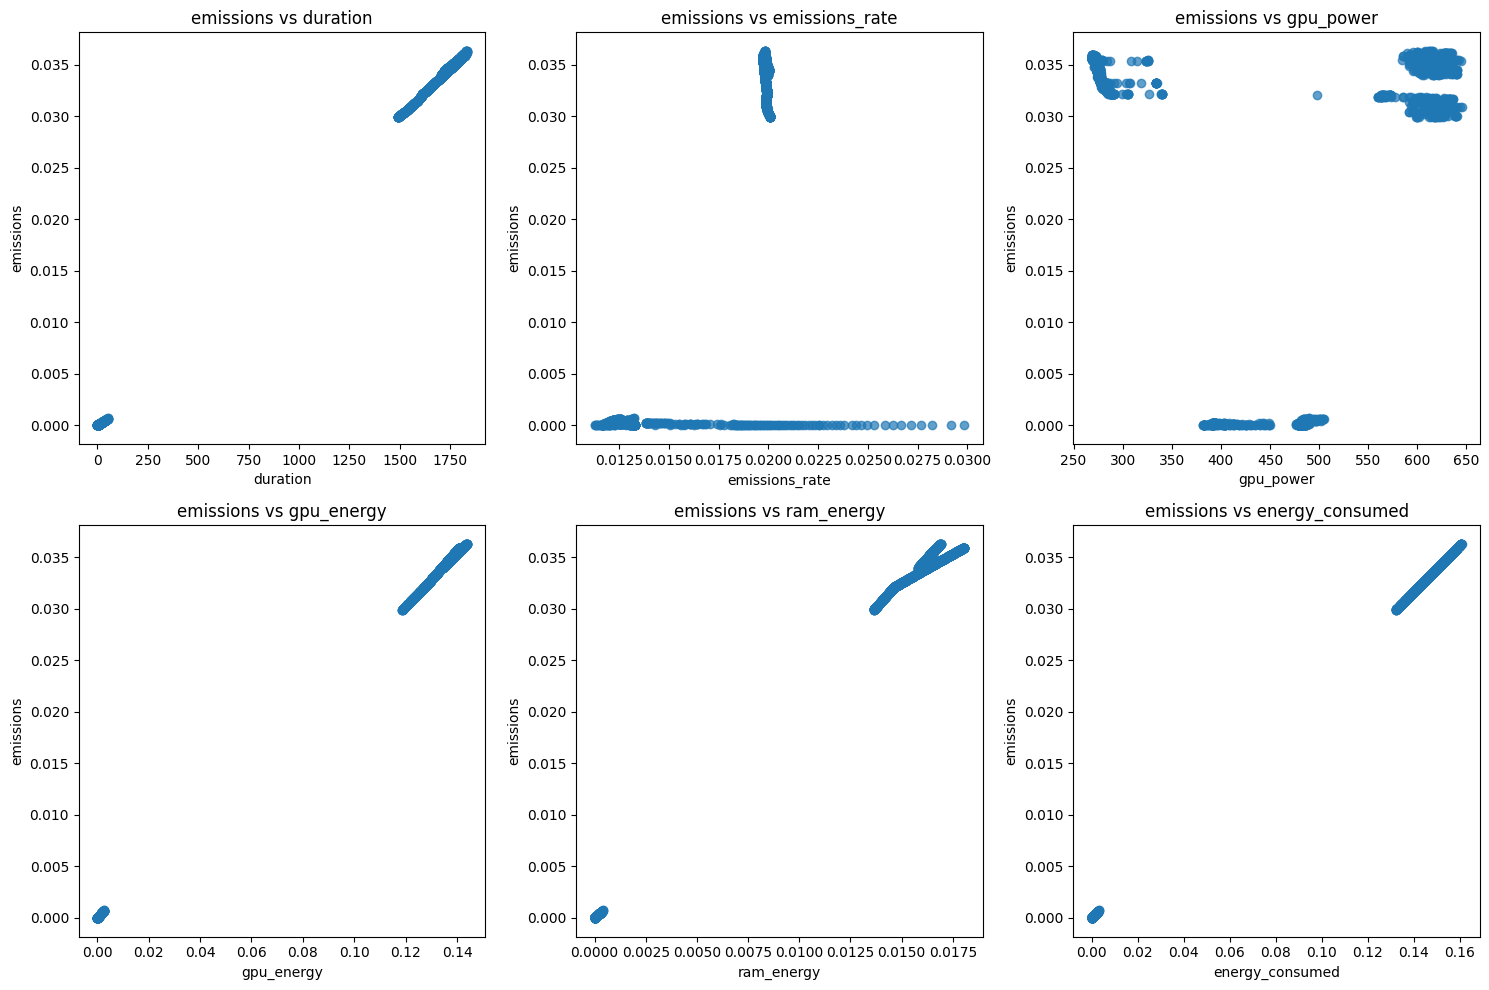

In [ ]:
# List of variables to plot on the x-axis
x_variables = ["duration", "emissions_rate", "gpu_power", "gpu_energy", "ram_energy", "energy_consumed"]

n_vars = len(x_variables)

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

axs = axs.flatten()

# Plot each variable against 'emissions'
for i, var in enumerate(x_variables):
    axs[i].scatter(bloom_df[var], bloom_df['emissions'], alpha=0.7)
    axs[i].set_title(f"emissions vs {var}")
    axs[i].set_xlabel(var)
    axs[i].set_ylabel("emissions")

plt.tight_layout()
plt.show()


## AI Models Dataset

We will do similar analyses for the AI Models Dataset. Below are the columns and number of null values. We see that there are many null features. Of particular interest are the carbon emissions from training, training energy, and training power columns. Training energy and emissions have majority null values. As such, our target feature should be the training power column as we can use that to extrapolate to energy and emissions.

In [ ]:
ai_models_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 33 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   System                                           223 non-null    object 
 1   Domain                                           223 non-null    object 
 2   Task                                             223 non-null    object 
 3   Authors                                          132 non-null    object 
 4   Model accessibility                              184 non-null    object 
 5   Link                                             220 non-null    object 
 6   Citations                                        76 non-null     float64
 7   Reference                                        185 non-null    object 
 8   Publication date                                 223 non-null    object 
 9   Organization                    

In [ ]:
# Remove all rows where training power is null

ai_model_na_removed = ai_models_df.dropna(axis=0, subset="Training power (Watts) ")

In [ ]:
ai_model_na_removed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130 entries, 0 to 222
Data columns (total 33 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   System                                           130 non-null    object 
 1   Domain                                           130 non-null    object 
 2   Task                                             130 non-null    object 
 3   Authors                                          87 non-null     object 
 4   Model accessibility                              115 non-null    object 
 5   Link                                             128 non-null    object 
 6   Citations                                        49 non-null     float64
 7   Reference                                        109 non-null    object 
 8   Publication date                                 130 non-null    object 
 9   Organization                         

In [ ]:
ai_model_na_removed.head()

,System,Domain,Task,Authors,Model accessibility,Link,Citations,Reference,Publication date,Organization,...,Finetune compute (FLOP),Finetune compute notes,Hardware quantity,Training code accessibility,Dataset accessibility,Accessibility notes,Organization categorization (from Organization),Training power (Watts),Training energy (kWh),Carbon Emissions from training (lb)
0,Firefly Video,Video,Video generation,Adobe,Hosted access (no API),https://news.adobe.com/news/2024/10/101424-ado...,NaN,Adobe Launches Firefly Video Model and Enhance...,2024-10-14,Adobe,...,NaN,NaN,NaN,NaN,NaN,NaN,Industry,3.300000e+14,NaN,NaN
1,Meta Movie Gen Video,Video,Video generation,"Adam Polyak, Amit Zohar, Andrew Brown, Andros ...",Unreleased,https://ai.meta.com/static-resource/movie-gen-...,NaN,Movie Gen: A Cast of Media Foundation Models,2024-10-04,Meta AI,...,NaN,NaN,6144.0,NaN,NaN,NaN,Industry,2.800000e+13,9.268000e+12,7.970480e+12
2,Meta Movie Gen Audio,Audio,Audio generation,"Adam Polyak, Amit Zohar, Andrew Brown, Andros ...",Unreleased,https://ai.meta.com/static-resource/movie-gen-...,NaN,Movie Gen: A Cast of Media Foundation Models,2024-10-04,Meta AI,...,NaN,NaN,384.0,NaN,NaN,NaN,Industry,3.470000e+13,1.248048e+13,1.073321e+13
3,Llama 3.2 3B,Language,"Language modelling/generation,Text summarizati...",NaN,Open weights (restricted use),https://ai.meta.com/blog/llama-3-2-connect-202...,NaN,Llama 3.2: Revolutionizing edge AI and vision ...,2024-09-24,Meta AI,...,NaN,NaN,NaN,Unreleased,NaN,LLAMA 3.2 COMMUNITY LICENSE AGREEMENT\n\nhttps...,Industry,1.600000e+15,NaN,NaN
4,Qwen2.5-72B,Language,Language modelling/generation,NaN,Open weights (unrestricted),https://qwenlm.github.io/blog/qwen2.5/,NaN,Qwen2.5: A Party of Foundation Models!,2024-09-19,Alibaba,...,NaN,NaN,NaN,Unreleased,Unreleased,license: allows commercial. weights only\nhttp...,Industry,1.210000e+14,NaN,NaN


In [ ]:
ai_model_na_removed["Model accessibility"].value_counts()

,count
Model accessibility,
Unreleased,32
API access,27
Open weights (restricted use),24
Open weights (non-commercial),12
Open weights (unrestricted),11
Hosted access (no API),9


In [ ]:
ai_model_na_removed["Task"].value_counts()

,count
Task,
Language modelling/generation,14
Language modelling,13
"Chat,Language modelling/generation",10
Code generation,6
Chat,6
"Code generation,Code autocompletion",5
Video generation,5
"Language modelling/generation,Chat",4
"Language modelling/generation,Question answering",4


In [ ]:
ai_model_na_removed.describe()

,Citations,Parameters,Training compute (FLOP),Training dataset size (datapoints),Training time (hours),Base model,Finetune compute (FLOP),Hardware quantity,Training power (Watts),Training energy (kWh),Carbon Emissions from training (lb)
count,49.000000,1.000000e+02,8.300000e+01,7.500000e+01,34.000000,0.0,0.0,34.000000,1.300000e+02,3.400000e+01,3.400000e+01
mean,2012.755102,1.170761e+11,1.960855e+24,3.232624e+12,1315.044118,NaN,NaN,4432.647059,4.799723e+14,1.587062e+15,1.364873e+15
std,4912.414963,1.912119e+11,4.183476e+24,4.001148e+12,1017.818513,NaN,NaN,5411.099227,1.292806e+15,7.165100e+15,6.161986e+15
min,0.000000,4.640024e+07,1.010000e+23,1.600000e+09,42.000000,NaN,NaN,256.000000,2.020000e+13,2.880000e+12,2.476800e+12
25%,45.000000,1.300000e+10,2.935000e+23,5.641000e+11,558.000000,NaN,NaN,850.000000,4.740000e+13,2.518920e+13,2.166271e+13
50%,347.000000,4.582943e+10,4.430000e+23,1.400000e+12,1211.000000,NaN,NaN,2024.000000,7.925000e+13,6.454160e+13,5.550578e+13
75%,966.000000,1.370000e+11,1.225000e+24,4.600000e+12,1686.000000,NaN,NaN,6144.000000,2.295000e+14,1.510640e+14,1.299150e+14
max,30858.000000,1.200000e+12,2.130000e+25,1.800000e+13,4320.000000,NaN,NaN,25000.000000,1.000000e+16,4.096000e+16,3.522560e+16


### AI Model Trends Over Time

<ipython-input-215-bc6adcfc92d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ai_model_na_removed['Publication date'] = pd.to_datetime(ai_model_na_removed['Publication date'])
<ipython-input-215-bc6adcfc92d1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ai_model_na_removed['Log Training Power'] = np.log(ai_model_na_removed['Training power (Watts) '])


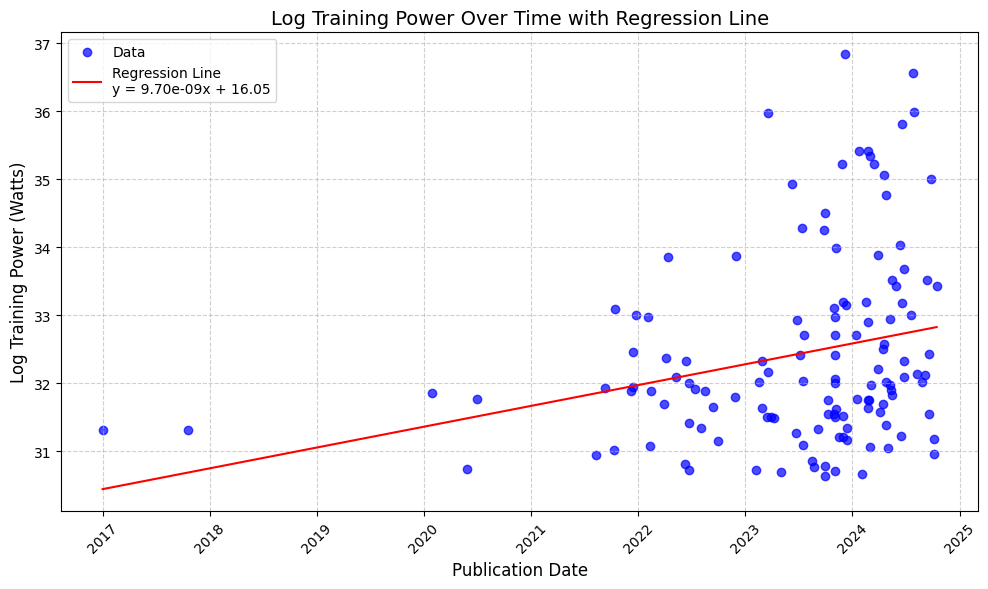

In [ ]:

# Ensure "Publication date" is in datetime format
ai_model_na_removed['Publication date'] = pd.to_datetime(ai_model_na_removed['Publication date'])

# Calculate log of Training Power
ai_model_na_removed['Log Training Power'] = np.log(ai_model_na_removed['Training power (Watts) '])

# Sort the DataFrame by publication date
ai_model_na_removed = ai_model_na_removed.sort_values('Publication date')

# Convert publication date to numeric format (e.g., timestamp) for regression
ai_model_na_removed['Timestamp'] = ai_model_na_removed['Publication date'].map(pd.Timestamp.timestamp)

# Perform linear regression on log-transformed data
x = ai_model_na_removed['Timestamp']
y = ai_model_na_removed['Log Training Power']
slope, intercept = np.polyfit(x, y, 1)

# Predicted values for the regression line
regression_line = slope * x + intercept

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(ai_model_na_removed['Publication date'], y, color='blue', alpha=0.7, label='Data')
plt.plot(ai_model_na_removed['Publication date'], regression_line, color='red', label=f'Regression Line\ny = {slope:.2e}x + {intercept:.2f}')
plt.title('Log Training Power Over Time with Regression Line', fontsize=14)
plt.xlabel('Publication Date', fontsize=12)
plt.ylabel('Log Training Power (Watts)', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


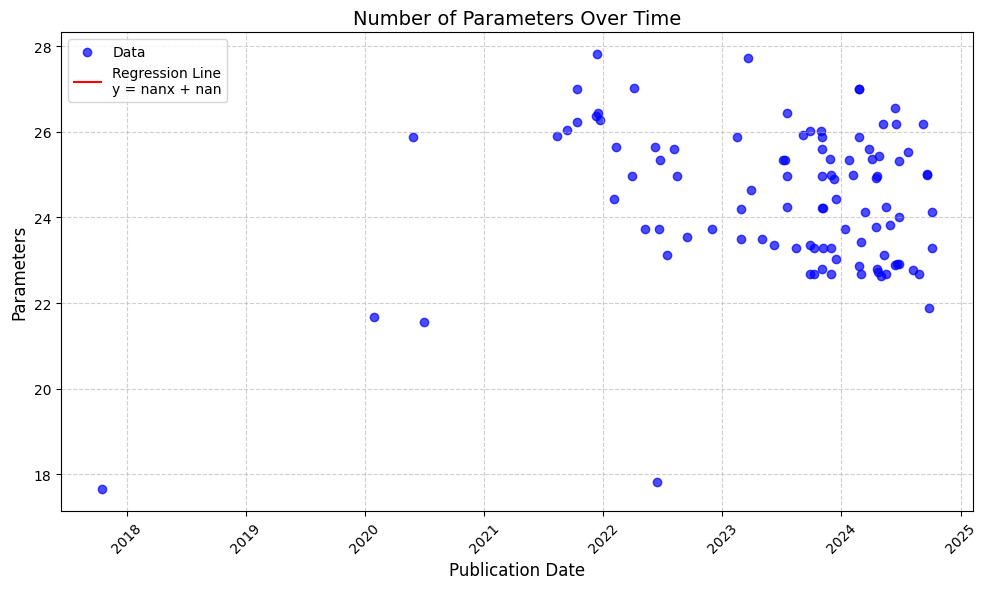

In [ ]:
# Perform linear regression on log-transformed data
x = ai_model_na_removed['Timestamp']
y = np.log(ai_model_na_removed['Parameters'])
slope, intercept = np.polyfit(x, y, 1)

# Predicted values for the regression line
regression_line = slope * x + intercept

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(ai_model_na_removed['Publication date'], y, color='blue', alpha=0.7, label='Data')
plt.plot(ai_model_na_removed['Publication date'], regression_line, color='red', label=f'Regression Line\ny = {slope:.2e}x + {intercept:.2f}')
plt.title('Number of Parameters Over Time', fontsize=14)
plt.xlabel('Publication Date', fontsize=12)
plt.ylabel('Parameters', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

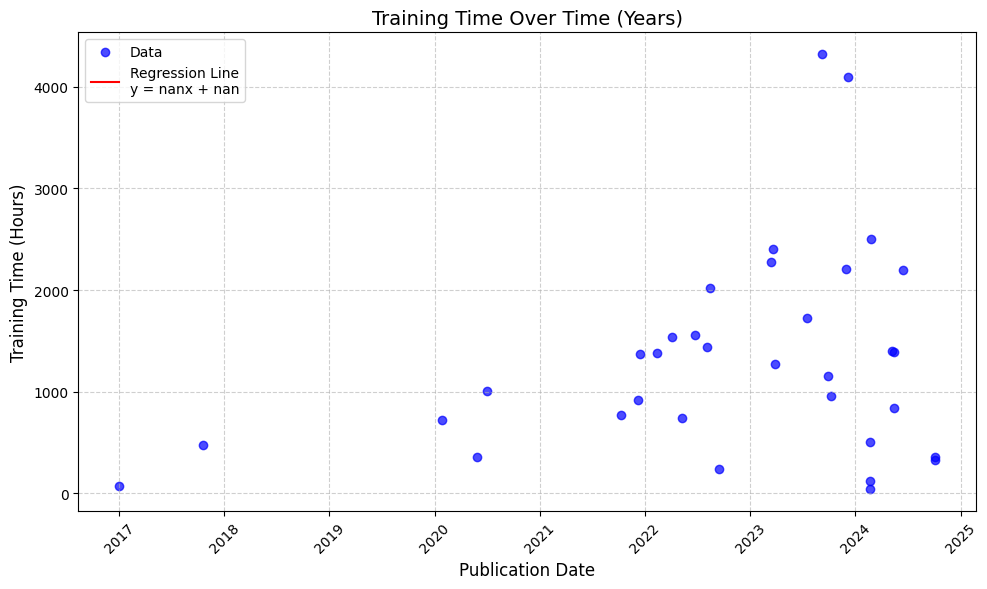

In [ ]:
# Perform linear regression on log-transformed data
x = ai_model_na_removed['Timestamp']
y = ai_model_na_removed['Training time (hours)']
slope, intercept = np.polyfit(x, y, 1)

# Predicted values for the regression line
regression_line = slope * x + intercept

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(ai_model_na_removed['Publication date'], y, color='blue', alpha=0.7, label='Data')
plt.plot(ai_model_na_removed['Publication date'], regression_line, color='red', label=f'Regression Line\ny = {slope:.2e}x + {intercept:.2f}')
plt.title('Training Time Over Time (Years)', fontsize=14)
plt.xlabel('Publication Date', fontsize=12)
plt.ylabel('Training Time (Hours)', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

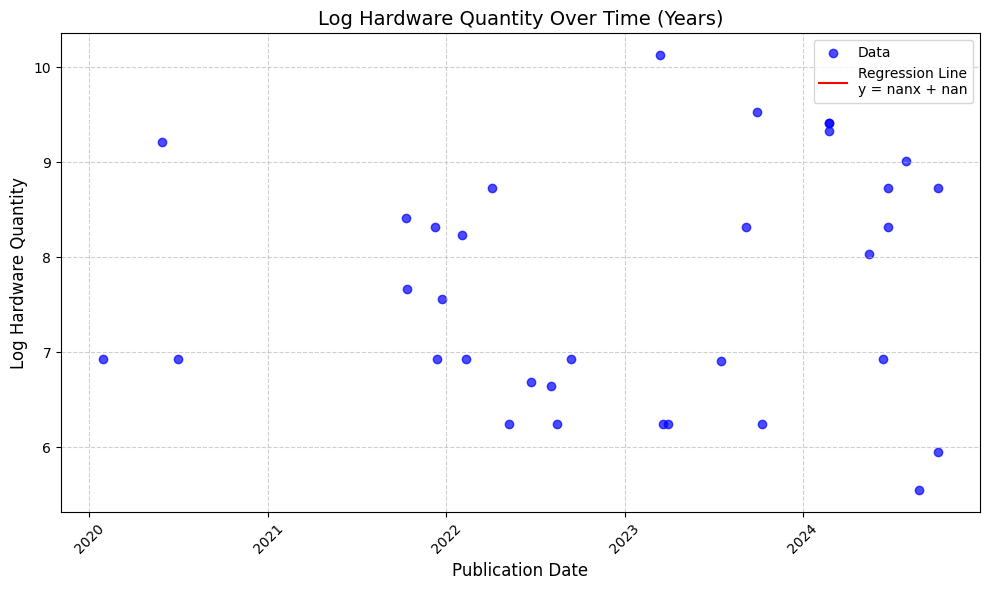

In [ ]:
# Perform linear regression on log-transformed data
x = ai_model_na_removed['Timestamp']
y = np.log(ai_model_na_removed['Hardware quantity'])
slope, intercept = np.polyfit(x, y, 1)

# Predicted values for the regression line
regression_line = slope * x + intercept

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(ai_model_na_removed['Publication date'], y, color='blue', alpha=0.7, label='Data')
plt.plot(ai_model_na_removed['Publication date'], regression_line, color='red', label=f'Regression Line\ny = {slope:.2e}x + {intercept:.2f}')
plt.title('Log Hardware Quantity Over Time (Years)', fontsize=14)
plt.xlabel('Publication Date', fontsize=12)
plt.ylabel('Log Hardware Quantity', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

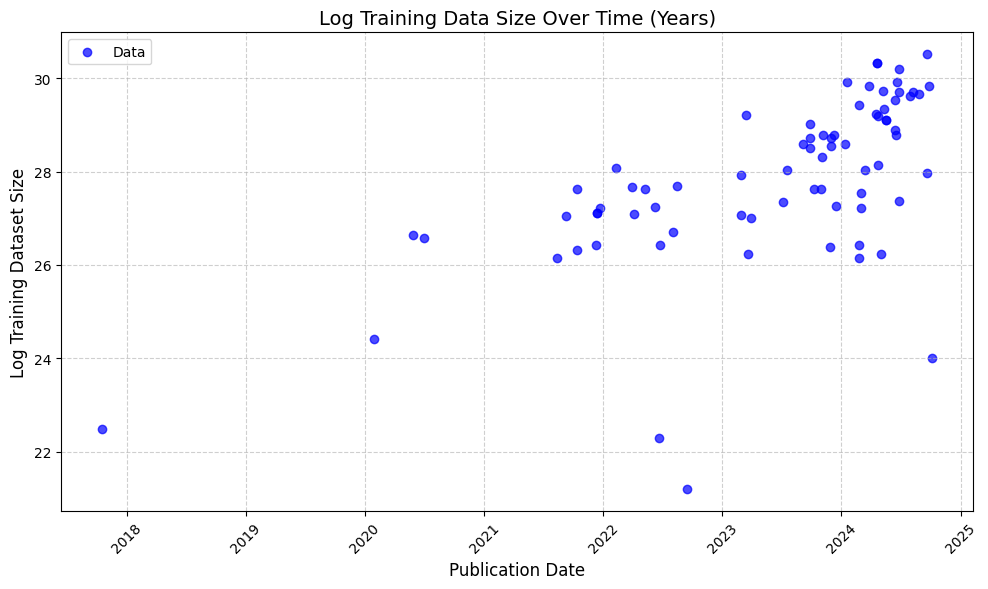

In [ ]:
x = ai_model_na_removed['Timestamp']
y = np.log(ai_model_na_removed['Training dataset size (datapoints)'])


# Scatter plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(ai_model_na_removed['Publication date'], y, color='blue', alpha=0.7, label='Data')
plt.title('Log Training Data Size Over Time (Years)', fontsize=14)
plt.xlabel('Publication Date', fontsize=12)
plt.ylabel('Log Training Dataset Size', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

From the plots above, we see that most features that are typically positively correlated to a model's complexity or performance have been increasing over time, reflecting the evolution of the AI industry. Let's see how these variables affect the model's power usage.

### Bivariate EDA with Training Power

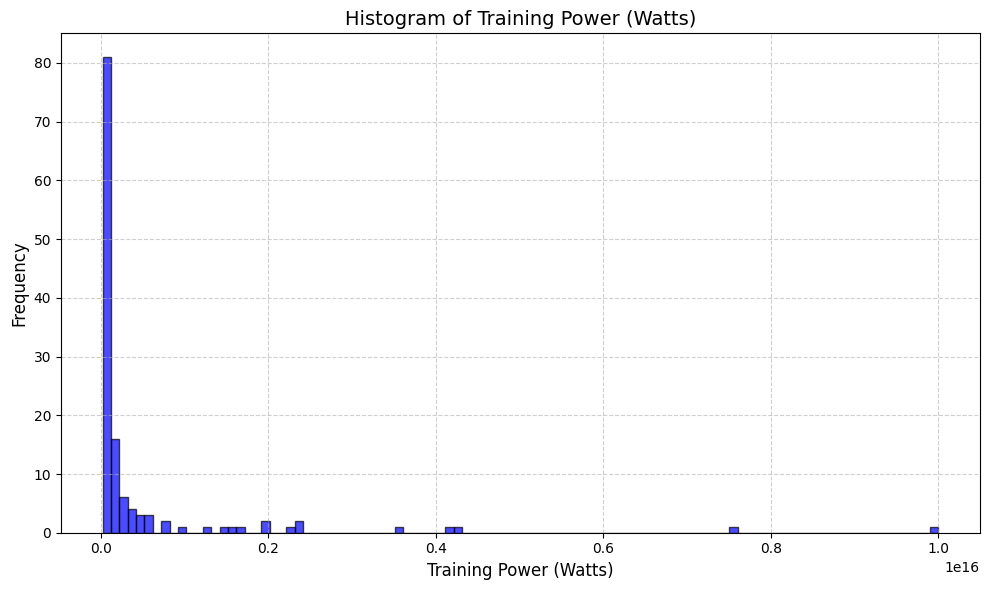

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(ai_model_na_removed['Training power (Watts) '], bins=100, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histogram of Training Power (Watts)', fontsize=14)
plt.xlabel('Training Power (Watts)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

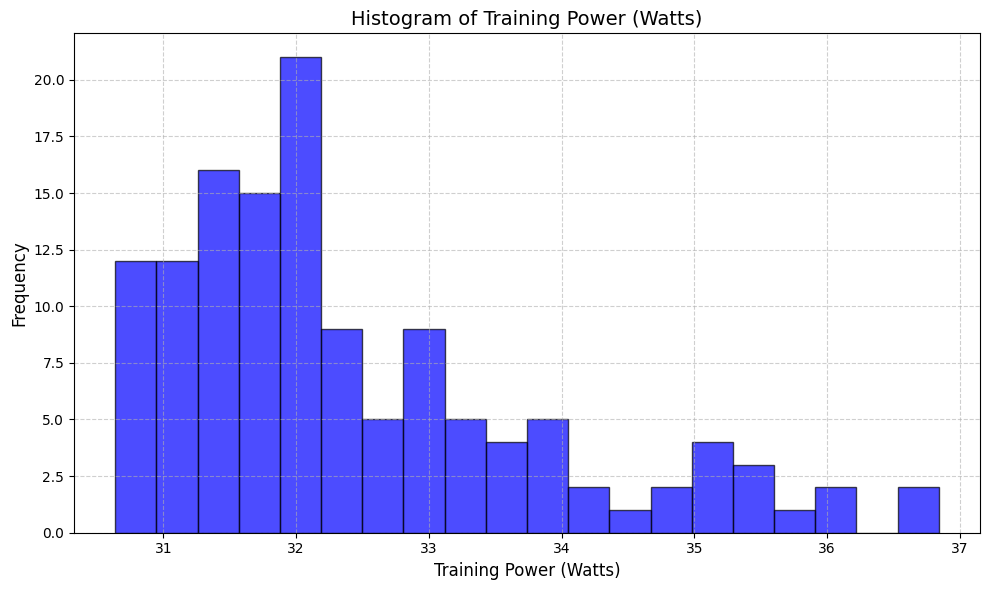

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(ai_model_na_removed['Log Training Power'], bins=20, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histogram of Training Power (Watts)', fontsize=14)
plt.xlabel('Training Power (Watts)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
ai_model_na_removed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130 entries, 222 to 0
Data columns (total 35 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   System                                           130 non-null    object        
 1   Domain                                           130 non-null    object        
 2   Task                                             130 non-null    object        
 3   Authors                                          87 non-null     object        
 4   Model accessibility                              115 non-null    object        
 5   Link                                             128 non-null    object        
 6   Citations                                        49 non-null     float64       
 7   Reference                                        109 non-null    object        
 8   Publication date                             

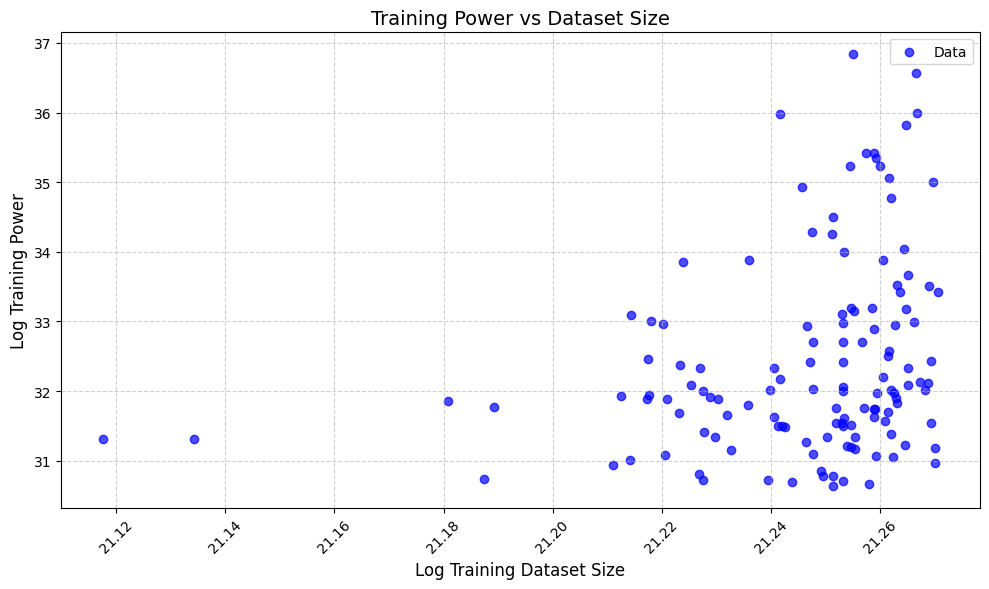

In [ ]:
y = np.log(ai_model_na_removed['Training power (Watts) '])
x = np.log(ai_model_na_removed['Timestamp'])

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.7, label='Data')
plt.title('Training Power vs Dataset Size', fontsize=14)
plt.xlabel('Log Training Dataset Size', fontsize=12)
plt.ylabel('Log Training Power', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

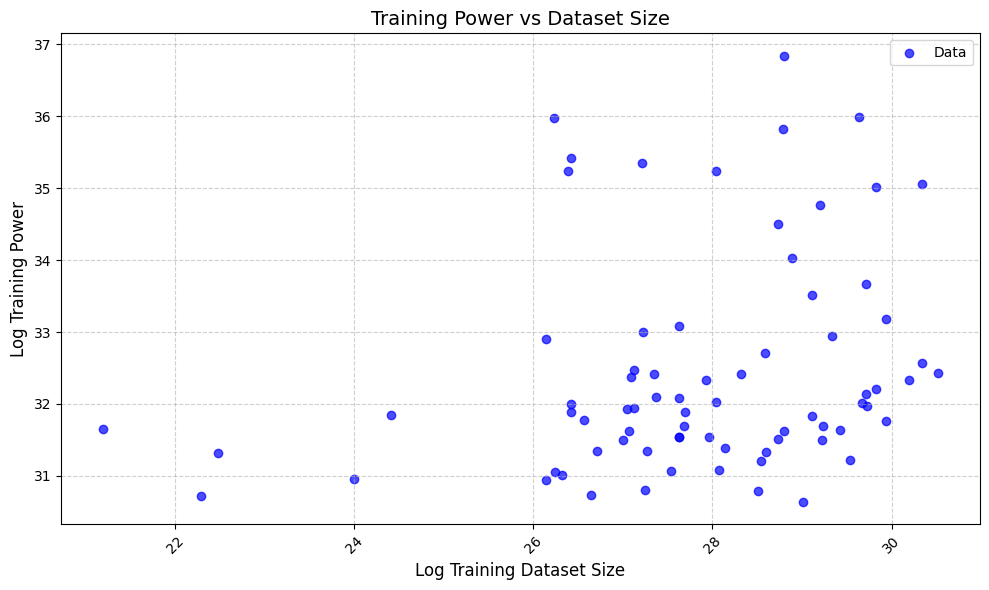

In [ ]:
y = np.log(ai_model_na_removed['Training power (Watts) '])
x = np.log(ai_model_na_removed['Training dataset size (datapoints)'])


plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.7, label='Data')
plt.title('Training Power vs Dataset Size', fontsize=14)
plt.xlabel('Log Training Dataset Size', fontsize=12)
plt.ylabel('Log Training Power', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

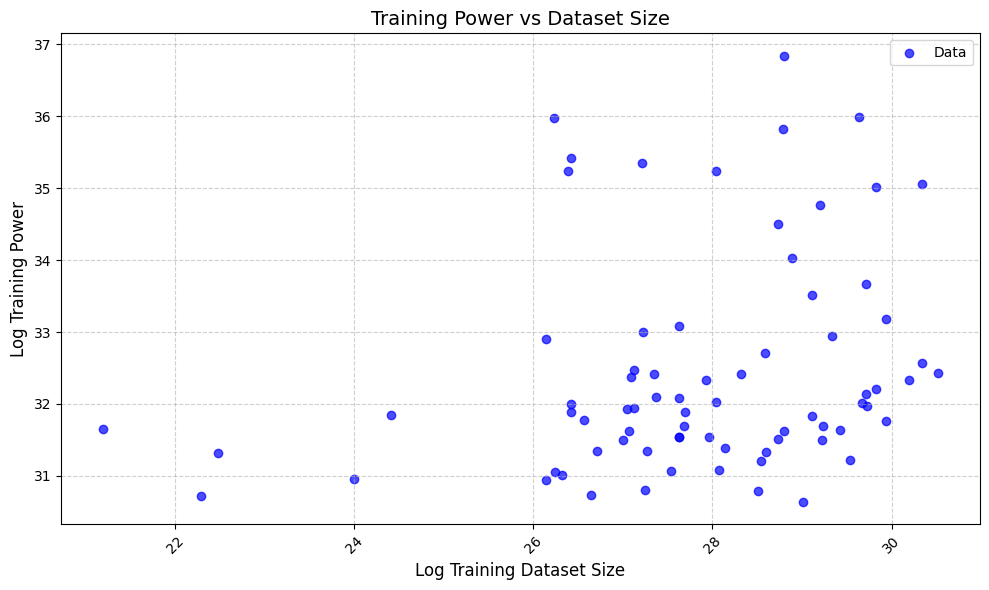

In [ ]:
y = np.log(ai_model_na_removed['Training power (Watts) '])
x = np.log(ai_model_na_removed['Training dataset size (datapoints)'])


plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.7, label='Data')
plt.title('Training Power vs Dataset Size', fontsize=14)
plt.xlabel('Log Training Dataset Size', fontsize=12)
plt.ylabel('Log Training Power', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

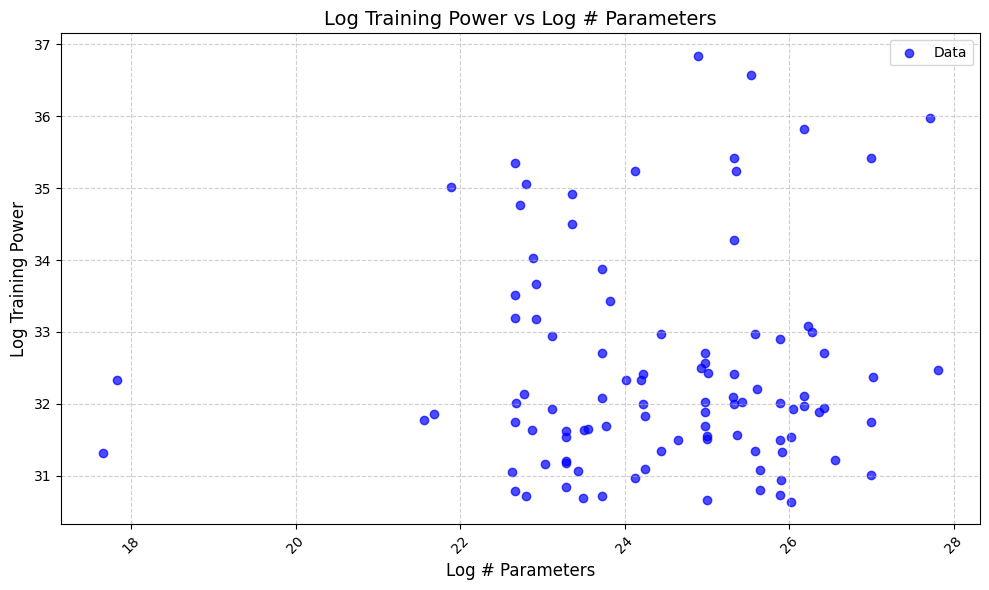

In [ ]:
y = (ai_model_na_removed['Log Training Power'])
x = np.log(ai_model_na_removed['Parameters'])

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.7, label='Data')
plt.title('Log Training Power vs Log # Parameters', fontsize=14)
plt.xlabel('Log # Parameters', fontsize=12)
plt.ylabel('Log Training Power', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Below is a plot of Log Training Power vs Log Training Dataset Size. We see a strong linear relationship between the two variables. This justifies our choice of Training Power as a proxy for carbon emissions. We will base our model around factors to predict training power.

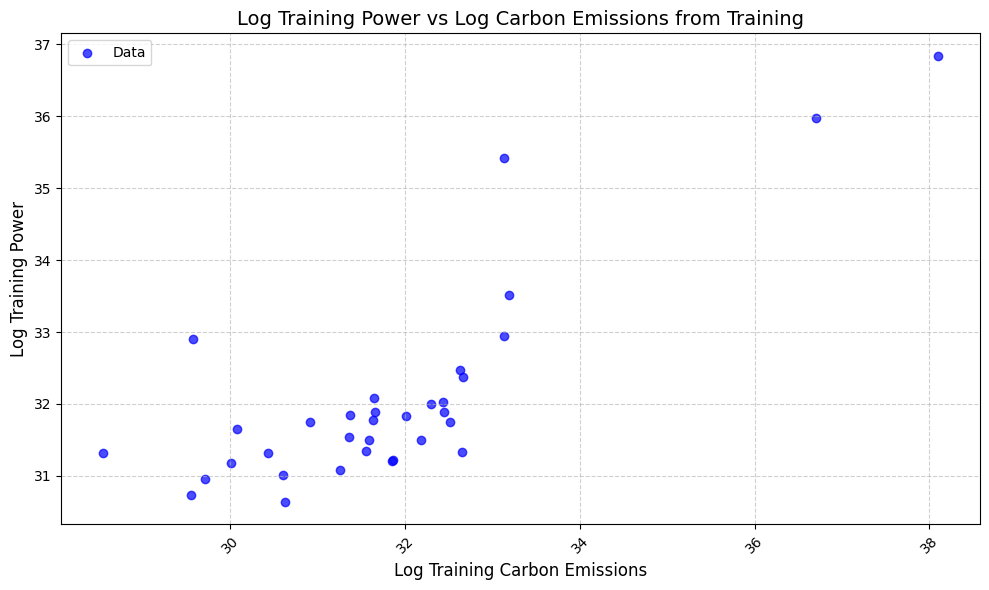

In [ ]:
y = np.log(ai_model_na_removed['Training power (Watts) '])
x = np.log(ai_model_na_removed['Carbon Emissions from training (lb)'])


# Scatter plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.7, label='Data')
plt.title('Log Training Power vs Log Carbon Emissions from Training', fontsize=14)
plt.xlabel('Log Training Carbon Emissions', fontsize=12)
plt.ylabel('Log Training Power', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


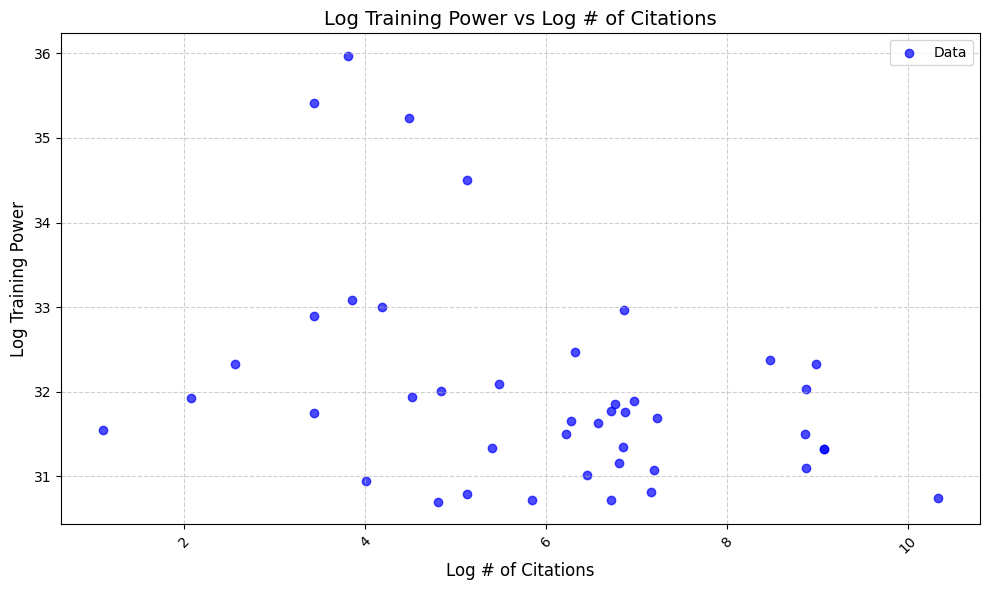

In [ ]:
y = np.log(ai_model_na_removed['Training power (Watts) '])
x = np.log(ai_model_na_removed['Citations'])

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.7, label='Data')
plt.title('Log Training Power vs Log # of Citations', fontsize=14)
plt.xlabel('Log # of Citations', fontsize=12)
plt.ylabel('Log Training Power', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

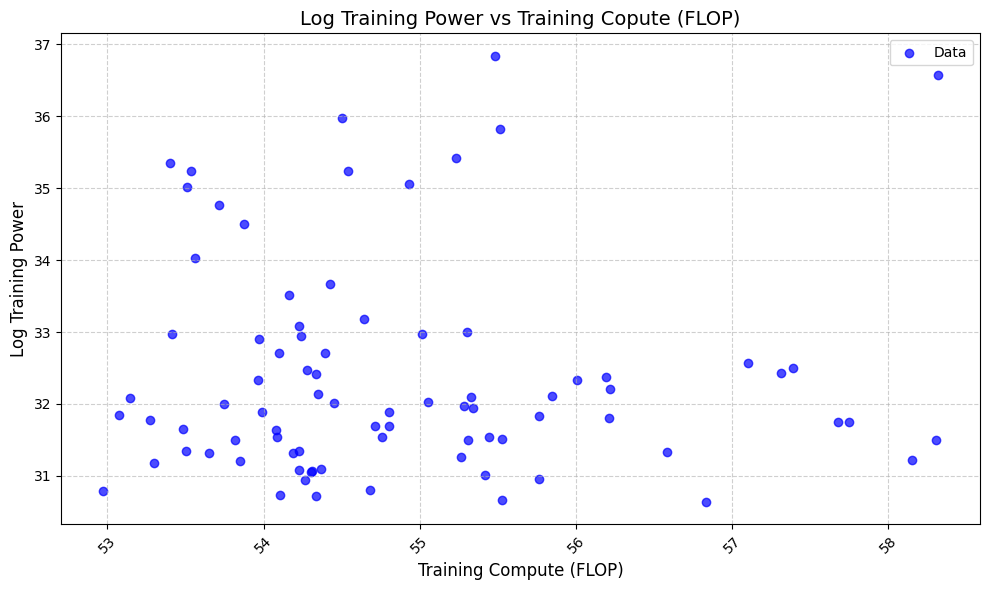

In [ ]:
y = np.log(ai_model_na_removed['Training power (Watts) '])
x = np.log(ai_model_na_removed['Training compute (FLOP)'])

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.7, label='Data')
plt.title('Log Training Power vs Training Copute (FLOP)', fontsize=14)
plt.xlabel('Training Compute (FLOP)', fontsize=12)
plt.ylabel('Log Training Power', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Below we explore the relationship between some categorical variables and training power.

In [ ]:
import seaborn as sns


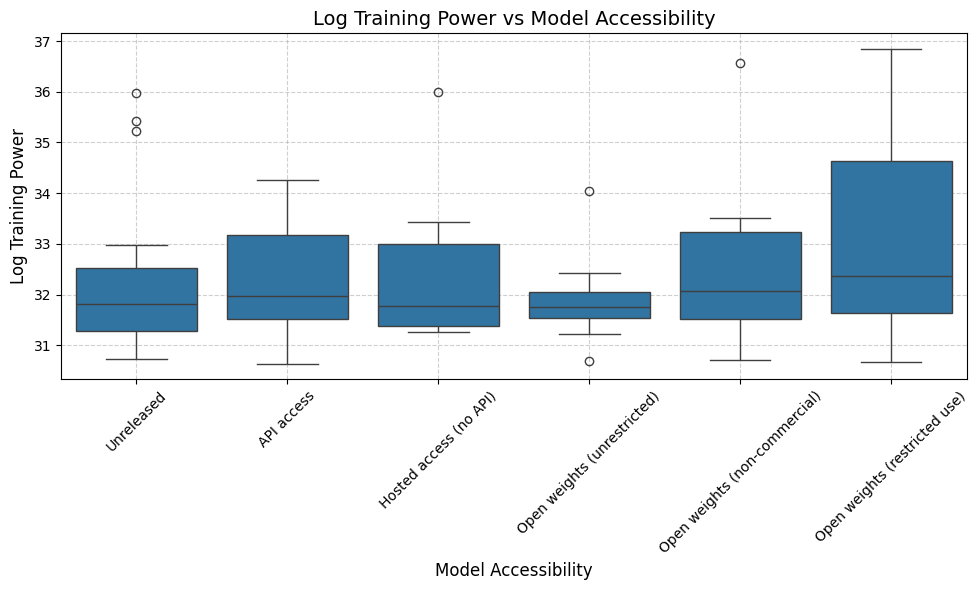

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Model accessibility', y='Log Training Power', data=ai_model_na_removed)
plt.title('Log Training Power vs Model Accessibility', fontsize=14)
plt.xlabel('Model Accessibility', fontsize=12)
plt.ylabel('Log Training Power', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


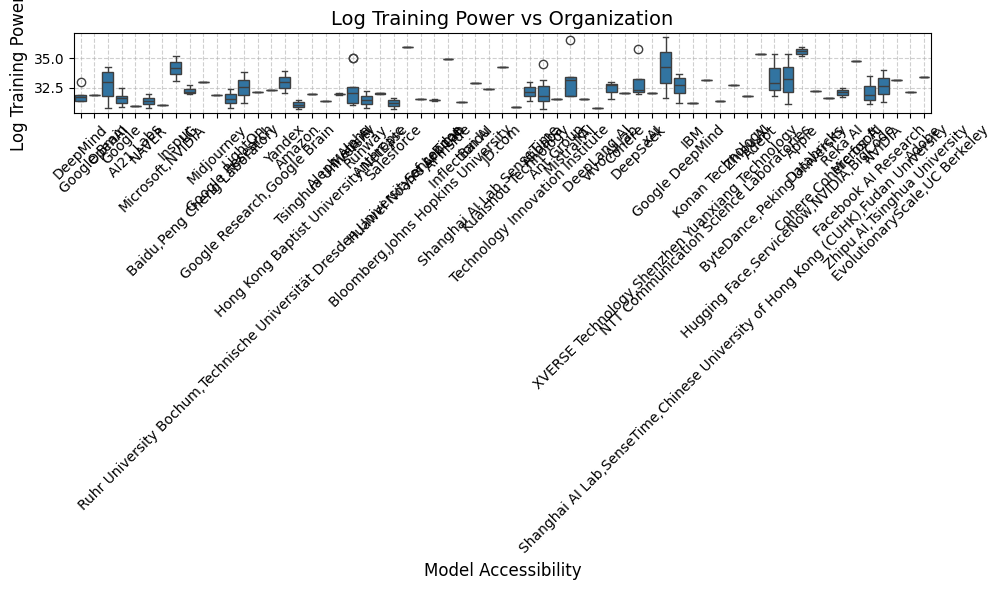

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Organization', y='Log Training Power', data=ai_model_na_removed)
plt.title('Log Training Power vs Organization', fontsize=14)
plt.xlabel('Model Accessibility', fontsize=12)
plt.ylabel('Log Training Power', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

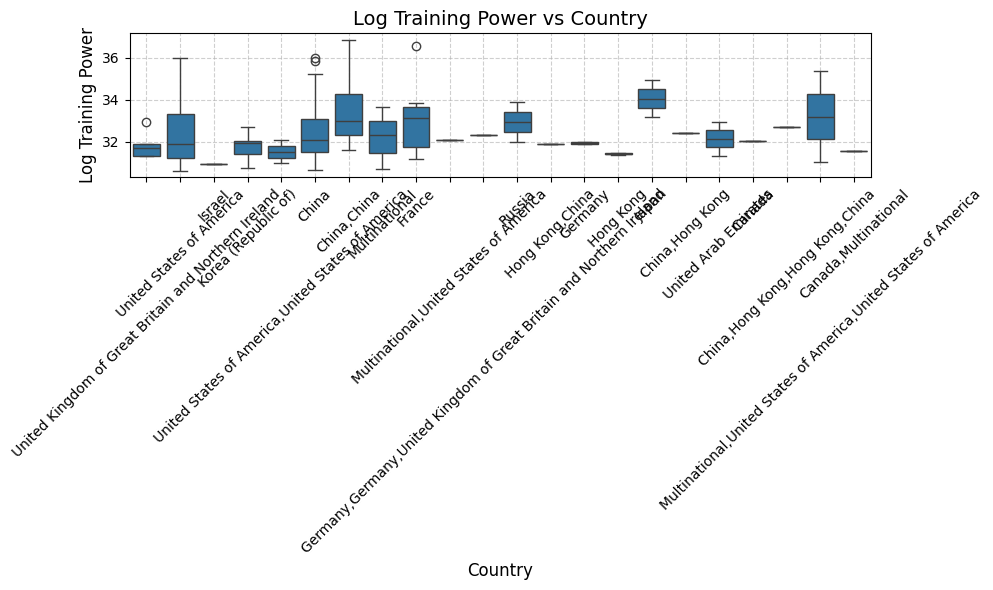

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Country (from Organization)', y='Log Training Power', data=ai_model_na_removed)
plt.title('Log Training Power vs Country', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Log Training Power', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

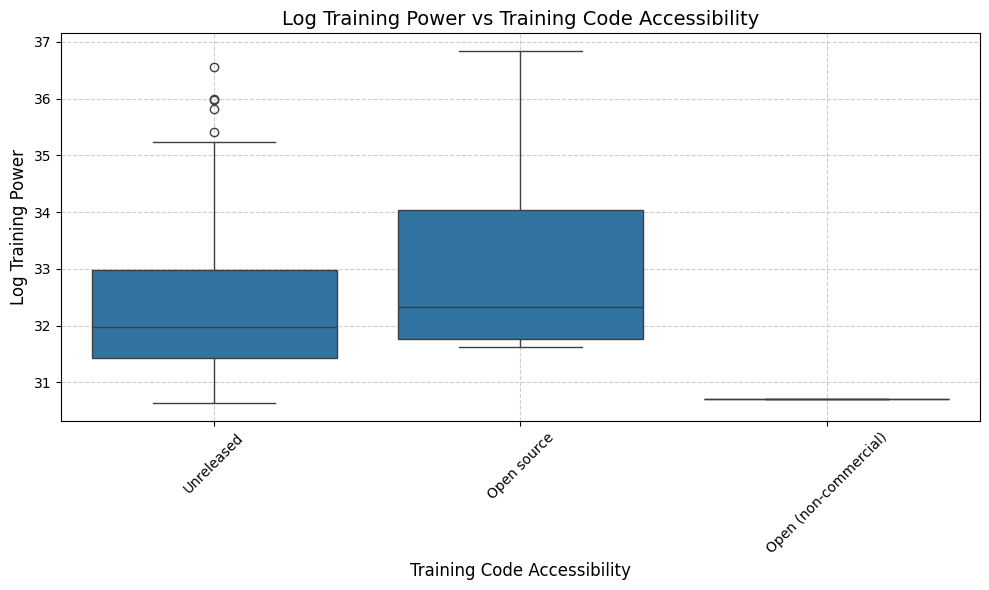

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Training code accessibility', y='Log Training Power', data=ai_model_na_removed)
plt.title('Log Training Power vs Training Code Accessibility', fontsize=14)
plt.xlabel('Training Code Accessibility', fontsize=12)
plt.ylabel('Log Training Power', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
# Code generated using ChatGPT, attempting to get broader categories of the "Task" feature.
task_mapping = {
    'Language modelling/generation': 'Language and Chat-based Models',
    'Language modelling': 'Language and Chat-based Models',
    'Chat': 'Language and Chat-based Models',
    'Code generation': 'Code-Related Tasks',
    'Video generation': 'Vision and Multimedia Generation',
    'Code generation,Code autocompletion': 'Code-Related Tasks',
    'Language modelling/generation,Question answering': 'Question Answering and Information Retrieval',
    'Language modelling/generation,Chat': 'Language and Chat-based Models',
    'Chat,Language modelling/generation,Question answering': 'Question Answering and Information Retrieval',
    'Chat,Language modelling/generation,Image captioning,Code generation,Code autocompletion': 'Language and Chat-based Models',
    'Chat,Language modelling/generation,Code generation': 'Language and Chat-based Models',
    'Go': 'Specialized Tasks',
    'Language modelling/generation,Translation': 'Specialized Tasks',
    'Language modelling,Visual question answering': 'Vision and Multimedia Generation',
    'Chat,Code generation': 'Code-Related Tasks',
    'Audio generation': 'Vision and Multimedia Generation',
    'Language modelling/generation,Chat,Code generation': 'Language and Chat-based Models',
    'Language modelling/generation,Translation,Code generation': 'Code-Related Tasks',
    'Language modelling,Language modelling/generation': 'Language and Chat-based Models',
    'Language modelling/generation,Vision-language generation,Visual question answering,Text-to-image': 'Vision and Multimedia Generation',
    'Language modelling/generation,Translation,Question answering': 'Question Answering and Information Retrieval',
    'Chat,Language modelling/generation,Question answering,Text summarization': 'Question Answering and Information Retrieval',
    'Visual question answering,Video description,Language modelling/generation,Translation,Question answering,Character recognition,Quantitative reasoning': 'Specialized Tasks',
    'Code generation,Language modelling/generation,Quantitative reasoning,Chat,Question answering,Translation': 'Specialized Tasks',
    'Language modelling/generation,Semantic search,Text classification,Question answering,Text summarization,Sentiment classification': 'Question Answering and Information Retrieval',
    'Language modelling/generation,Question answering,Code generation,Text-to-image,Image generation': 'Vision and Multimedia Generation',
    'Chat,Image captioning,Code generation,Language modelling/generation': 'Vision and Multimedia Generation',
    'Chat,Image generation,Audio generation,Vision-language generation,Table tasks,Language modelling/generation,Question answering,Speech recognition': 'Vision and Multimedia Generation',
    'Language modelling/generation,Chat,Question answering,Text summarization,Table tasks': 'Question Answering and Information Retrieval',
    'Language modelling/generation,Code generation,Question answering': 'Language and Chat-based Models',
    'Language modelling/generation,Language generation,Translation,Code autocompletion': 'Code-Related Tasks',
    'Chat,Language modelling/generation,Code generation,Visual question answering': 'Language and Chat-based Models',
    'Protein generation': 'Specialized Tasks',
    'Language modelling/generation,Code generation,Question answering,Translation,Visual question answering': 'Question Answering and Information Retrieval',
    'Chat,Image captioning': 'Vision and Multimedia Generation',
    'Semantic search,Image generation,Language modelling/generation,Code generation,Chat,Text-to-image,Translation': 'Vision and Multimedia Generation',
    'Chat,Language modelling/generation,Image generation,Speech synthesis,Table tasks,Visual question answering,Image captioning': 'Vision and Multimedia Generation',
    'Language generation,Language modelling/generation,Question answering,Text summarization,Translation': 'Question Answering and Information Retrieval',
    'Text autocompletion,Language modelling/generation': 'Specialized Tasks',
    'Translation': 'Specialized Tasks',
    'Language modelling,Question answering': 'Question Answering and Information Retrieval',
    'Translation,Language modelling/generation,Visual question answering': 'Specialized Tasks',
    'Image generation': 'Vision and Multimedia Generation',
    'Language modelling,Code generation,Translation': 'Code-Related Tasks',
    'Language modelling/generation,Translation,Text summarization,Text classification': 'Specialized Tasks',
    'Text-to-image': 'Vision and Multimedia Generation',
    'Language modelling,Chat': 'Language and Chat-based Models',
    'Language generation': 'Specialized Tasks',
    'Visual question answering,Language modelling/generation': 'Vision and Multimedia Generation',
    'Language modelling,Code generation': 'Code-Related Tasks',
    'Code generation,Language modelling,Translation,Question answering': 'Code-Related Tasks',
    'Language modelling,Image generation,Visual question answering': 'Vision and Multimedia Generation',
    'Language modelling/generation,Chat,Search,Translation,Code generation,Question answering,Quantitative reasoning': 'Question Answering and Information Retrieval',
    'Text autocompletion': 'Specialized Tasks',
    'Code generation,Language generation': 'Code-Related Tasks',
    'Language modelling/generation,Code generation,Translation': 'Code-Related Tasks',
    'Semantic embedding': 'Specialized Tasks',
    'Language modelling/generation,Text summarization,Question answering,Quantitative reasoning,Translation': 'Specialized Tasks',
}

# Apply the mapping to the "Task" column
ai_model_na_removed['Reduced Task'] = ai_model_na_removed['Task'].map(task_mapping)


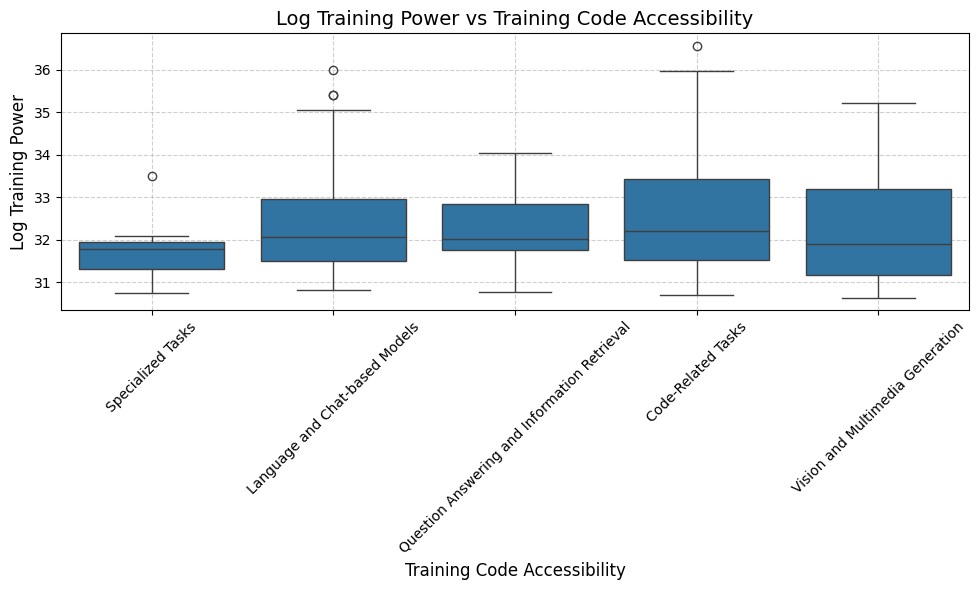

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Reduced Task', y='Log Training Power', data=ai_model_na_removed)
plt.title('Log Training Power vs Training Code Accessibility', fontsize=14)
plt.xlabel('Training Code Accessibility', fontsize=12)
plt.ylabel('Log Training Power', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### **SUMMARY FROM EDA**
We were unable to find features that are highly correlated with epower use. However, the following variable appear to be somewhat associated with Training power usage.

Potential Features:
- Training compute (FLOP)
- 'Training dataset size (datapoints)'
- Parameters
- Publication Date

## Power Insights: Optimizing Energy Efficiency in HPC Nodes

We examined a dataset that tracked the power consumption quantiles for each node of the Eagle HPC system at idle used to create the BUTTER-E dataset during a two month time period around the time of the BUTTER-E dataset creation. BUTTER-E, BEst pruned Tree-rEcursive Engine, is a deep learning algorithm used to optimize decision trees, improving computational overhead and improving energy efficiency. By examining the power consumption of these nodes, we can identify the challenges they face and generalize these insights to better understand the baseline power usage of the nodes when they are not heavily utilized.

Downloading...
From: https://drive.google.com/uc?id=1AbwDRzRNghewKuUkeuNxytUznGgrq_c6
To: /content/node_power_dist.csv
100% 1.75M/1.75M [00:00<00:00, 145MB/s]
 bloom_emissions.csv	      large_scale_ai_models_added_cols.csv   sample_data
'EC2 Instances Dataset.csv'   node_power_dist.csv


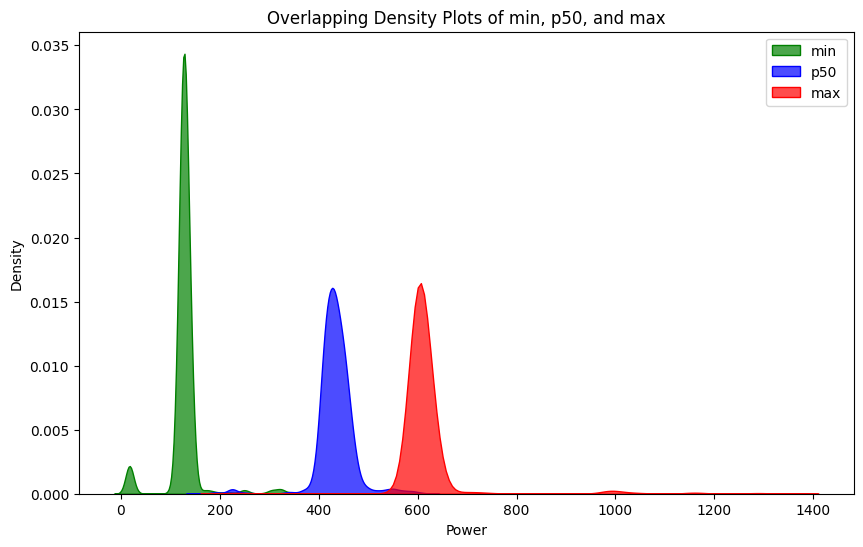

In [ ]:
!gdown "1AbwDRzRNghewKuUkeuNxytUznGgrq_c6" # https://drive.google.com/file/d/1AbwDRzRNghewKuUkeuNxytUznGgrq_c6/view?usp=sharing
!ls

import pandas as pd
import plotly.graph_objects as go
import seaborn as sns

df = pd.read_csv('node_power_dist.csv')


plt.figure(figsize=(10, 6))

sns.kdeplot(df['min'], fill=True, color='green', label='min', alpha=0.7)
sns.kdeplot(df['p50'], fill=True, color='blue', label='p50', alpha=0.7)
sns.kdeplot(df['max'], fill=True, color='red', label='max', alpha=0.7)

plt.title('Overlapping Density Plots of min, p50, and max')
plt.xlabel('Power')
plt.ylabel('Density')

plt.legend()
plt.show()


There are three overlapping density plots that show the distribution of power consumption values for the minimum power consumption (min), the 50th percentile power consumption (p50, which is the median) and the maximum power consumption (max) for all the nodes. All of the nodes in this dataset have GPUs with 36 processing units, according to the node_sinfo.csv  dataset.

These quantiles show us the range of power consumption values, helping to identify whether nodes have stable versus highly variable energy usage.
The min, p50, and max values have a similar distribution, but it seems as though all three have outliers. We decided to focus on examining the amount of outliers with unusually high power consumption.



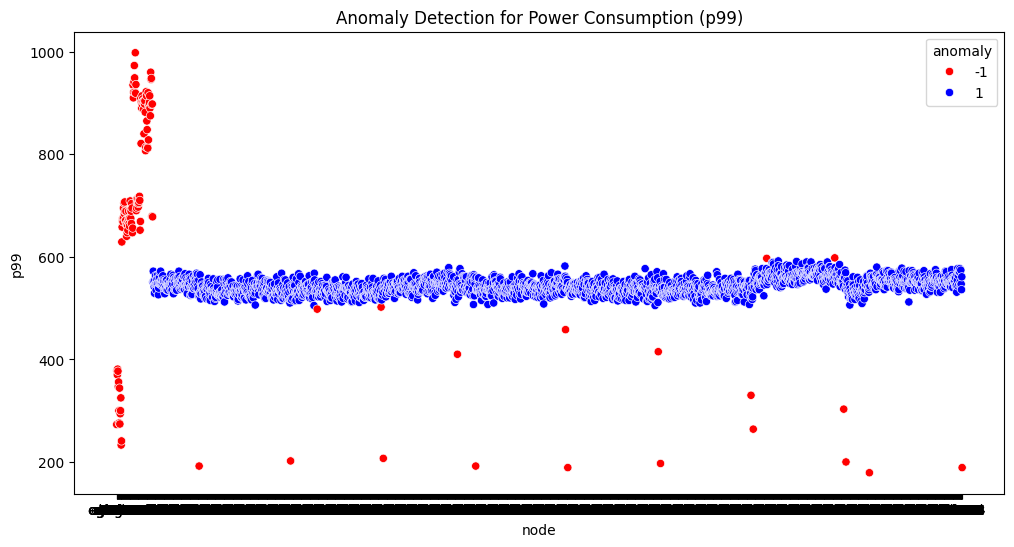

In [ ]:
from sklearn.ensemble import IsolationForest
df = pd.read_csv('node_power_dist.csv')

X = df[['p99']]
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['anomaly'] = iso_forest.fit_predict(X)

plt.figure(figsize=(12, 6))
sns.scatterplot(x='node', y='p99', hue='anomaly', data=df, palette={1: 'blue', -1: 'red'})
plt.title('Anomaly Detection for Power Consumption (p99)')
plt.show()

The model uses Isolation Forest to detect anomalies in the power consumption at the 99th percentile (p99) for each node. It then visualizes the results using a scatter plot, where nodes with normal power consumption are shown in blue and those with anomalous power consumption are shown in red. The presence of many outliers in the power consumption range of 600-1000 watts suggests that there are periods or instances when certain nodes are consuming significantly higher power than expected. Since this isn't due to when nodes are running resource-intensive tasks since the nodes are idle, it could be due to other factors.

Large financial institutions like BNY often rely on data centers and high-performance computing (HPC) systems to process vast amounts of financial data. As the demand for more advanced models increases, improving both the sustainability of deep learning algorithms becomes critical. By analyzing the power consumption of HPC nodes running deep learning models, we can identify key areas for energy efficiency optimizations. From our analysis, we have identified several potential factors contributing to high energy consumption and performance inefficiencies.
*   Hardware Constraints
*   Inefficient Workload Distribution

Although this dataset didn't include when nodes were running tasks, some factors contributing to high energy consumption for these cases could be:
*   Energy-Intensive Algorithms
*   Suboptimal Hyperparameters

More research can be done to pinpoint what issues are causing these energy inefficiencies. Then, by focusing on these areas, we can implement targeted strategies to optimize energy usage while maintaining the performance of deep learning models.








# AWS EC2 Instances


In [ ]:
!gdown "1tGBiB8pa34inV6zlCOPafIqH9fDuef_W" # "https://drive.google.com/file/d/1tGBiB8pa34inV6zlCOPafIqH9fDuef_W"
!ls

Downloading...
From: https://drive.google.com/uc?id=1tGBiB8pa34inV6zlCOPafIqH9fDuef_W
To: /content/EC2 Instances Dataset.csv
100% 188k/188k [00:00<00:00, 52.6MB/s]
 bloom_emissions.csv	      large_scale_ai_models_added_cols.csv   sample_data
'EC2 Instances Dataset.csv'   node_power_dist.csv


In [ ]:
aws_df = pd.read_csv("EC2 Instances Dataset.csv")
aws_df.head()
aws_df.columns

Index(['Instance type', 'Release Date', 'Instance vCPU',
       'Platform Total Number of vCPU', 'Platform CPU Name',
       'Instance Memory (in GB)', 'Platform Memory (in GB)',
       'Storage Info (Type and Size in GB)', 'Storage Type',
       'Platform Storage Drive Quantity', 'Platform GPU Quantity',
       'Platform GPU Name', 'Instance Number of GPU',
       'Instance GPU memory (in GB)', 'PkgWatt @ Idle', 'PkgWatt @ 10%',
       'PkgWatt @ 50%', 'PkgWatt @ 100%', 'RAMWatt @ Idle', 'RAMWatt @ 10%',
       'RAMWatt @ 50%', 'RAMWatt @ 100%', 'GPUWatt @ Idle', 'GPUWatt @ 10%',
       'GPUWatt @ 50%', 'GPUWatt @ 100%', 'Delta Full Machine',
       'Instance @ Idle', 'Instance @ 10%', 'Instance @ 50%',
       'Instance @ 100%', 'Platform Additional Memory Scope 3 Emissions',
       'Platform Additional Storage Scope 3 Emissions',
       'Platform Additional GPU Scope 3 Emissions',
       'Platform Additional CPU Scope 3 Emissions',
       'Total Platform Scope 3 Emissions  (kgCO₂eq)'

In [ ]:
aws_df.iloc[:, 14:37] = aws_df.iloc[:, 14:37].applymap(lambda x: pd.to_numeric(x.replace(",", "."), errors='coerce'))
aws_df.iloc[:, 5:6] = aws_df.iloc[:, 5:6].applymap(lambda x: pd.to_numeric(x.replace(",", "."), errors='coerce'))

aws_df.head()

<ipython-input-241-aca4131d08af>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  aws_df.iloc[:, 14:37] = aws_df.iloc[:, 14:37].applymap(lambda x: pd.to_numeric(x.replace(",", "."), errors='coerce'))
<ipython-input-241-aca4131d08af>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  aws_df.iloc[:, 5:6] = aws_df.iloc[:, 5:6].applymap(lambda x: pd.to_numeric(x.replace(",", "."), errors='coerce'))


,Instance type,Release Date,Instance vCPU,Platform Total Number of vCPU,Platform CPU Name,Instance Memory (in GB),Platform Memory (in GB),Storage Info (Type and Size in GB),Storage Type,Platform Storage Drive Quantity,...,Instance @ 10%,Instance @ 50%,Instance @ 100%,Platform Additional Memory Scope 3 Emissions,Platform Additional Storage Scope 3 Emissions,Platform Additional GPU Scope 3 Emissions,Platform Additional CPU Scope 3 Emissions,Total Platform Scope 3 Emissions (kgCO₂eq),Instance Hourly Manufacturing Emissions (gCO₂eq),Hardware Information on AWS Documentation & Comments
0,a1.medium,November 2018,1,16,Graviton,2.0,32,EBS-Only,EBS,0,...,1.9,3.2,4.2,22.2,0.0,0.0,0.0,1022.2,1.8,AWS Graviton (ARM)
1,a1.large,November 2018,2,16,Graviton,4.0,32,EBS-Only,EBS,0,...,3.8,6.4,8.5,22.2,0.0,0.0,0.0,1022.2,3.7,AWS Graviton (ARM)
2,a1.xlarge,November 2018,4,16,Graviton,8.0,32,EBS-Only,EBS,0,...,7.6,12.7,17.0,22.2,0.0,0.0,0.0,1022.2,7.4,AWS Graviton (ARM)
3,a1.2xlarge,November 2018,8,16,Graviton,16.0,32,EBS-Only,EBS,0,...,15.2,25.4,34.0,22.2,0.0,0.0,0.0,1022.2,14.8,AWS Graviton (ARM)
4,a1.4xlarge,November 2018,16,16,Graviton,32.0,32,EBS-Only,EBS,0,...,30.3,50.9,67.9,22.2,0.0,0.0,0.0,1022.2,29.6,AWS Graviton (ARM)


<Figure size 1500x800 with 0 Axes>

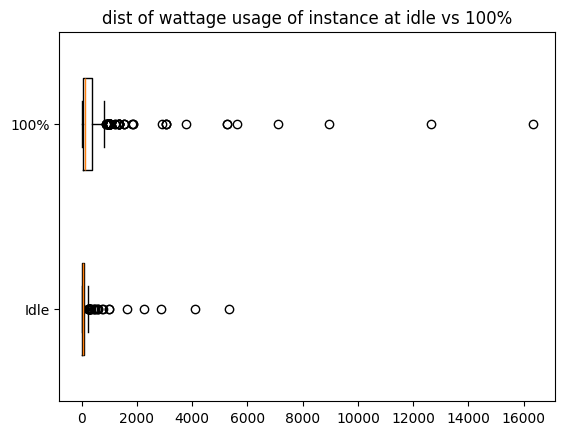

<Figure size 1500x800 with 0 Axes>

In [ ]:
plt.boxplot([aws_df["Instance @ Idle"], aws_df["Instance @ 100%"]], labels = ["Idle", "100%"], vert = False, widths=0.5)
plt.title("dist of wattage usage of instance at idle vs 100%")
plt.figure(figsize=(15,8))

There are a lot of outliers for both idle and 100% use of instance types.

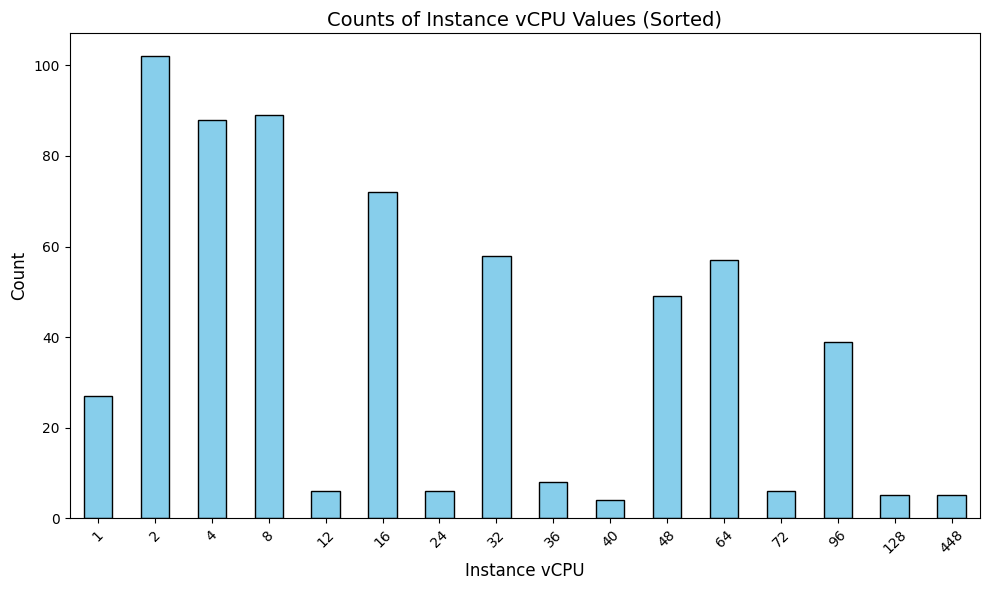

In [ ]:
vcpu_counts = aws_df['Instance vCPU'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
vcpu_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('Instance vCPU', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Counts of Instance vCPU Values (Sorted)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Wide variety of CPU counts, most common ones are lower counts due to users often not needing large computing scale

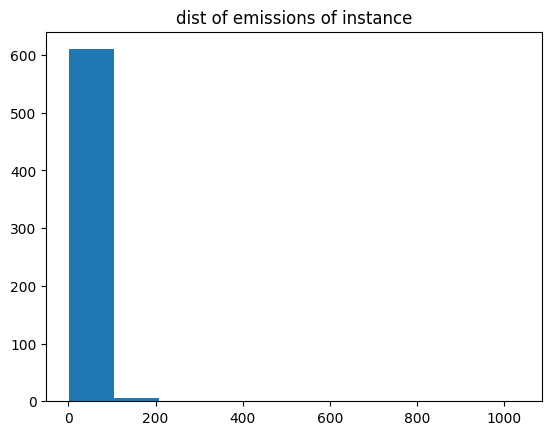

In [ ]:
aws_df = aws_df.rename(columns={"Instance Hourly Manufacturing Emissions (gCO₂eq)": "Instance_Hourly_Manufacturing_Emissions_gCO2eq"})
plt.hist(aws_df["Instance_Hourly_Manufacturing_Emissions_gCO2eq"])
plt.title("dist of emissions of instance")
plt.show()

<ipython-input-245-c746c74a1c68>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  aws_df['Release Date'] = pd.to_datetime(aws_df['Release Date'])


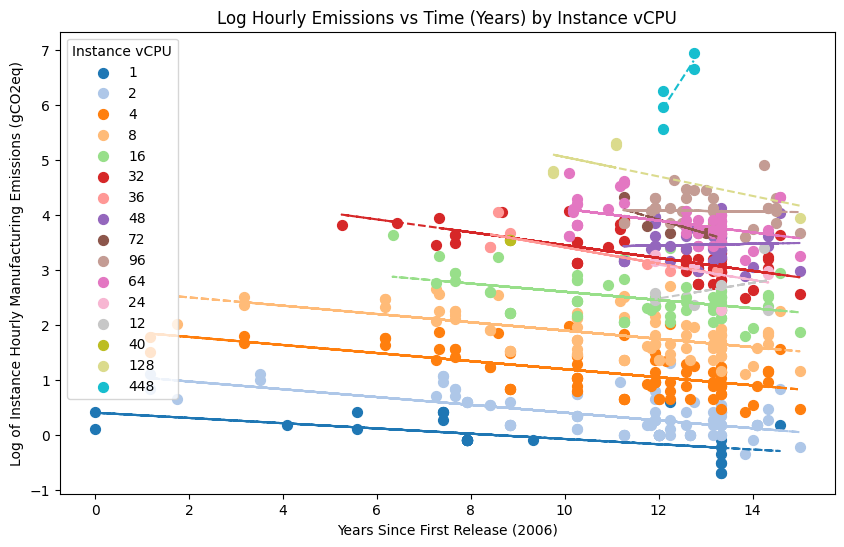

In [ ]:
aws_df['Release Date'] = pd.to_datetime(aws_df['Release Date'])
aws_df['Days Since First Release'] = (aws_df['Release Date'] - aws_df['Release Date'].min()).dt.days

aws_df['Years Since First Release'] = (aws_df['Days Since First Release']/365.25).values
X = aws_df['Years Since First Release'].values.reshape(-1, 1)

aws_df["Log Emissions"] = np.log(aws_df['Instance_Hourly_Manufacturing_Emissions_gCO2eq'].astype("float"))
y = aws_df['Log Emissions'].values

plt.figure(figsize=(10, 6))
cmap = plt.colormaps['tab20']
unique_cpus = aws_df['Instance vCPU'].unique()
color_map = {cpu: cmap(i / len(unique_cpus)) for i, cpu in enumerate(unique_cpus)}


for cpu in unique_cpus:
    # Subset the data for the current Instance_CPU
    subset = aws_df[aws_df['Instance vCPU'] == cpu]

    # Prepare the independent (X) and dependent (y) variables
    X = subset['Years Since First Release'].values.reshape(-1, 1)
    y = subset['Log Emissions'].values

    # Fit a linear regression model for the subset
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    # Plot data points for this category
    plt.scatter(X, y, label=f'{cpu}', color=color_map[cpu], s=50)

    # Plot the regression line for this category
    plt.plot(X, y_pred, color=color_map[cpu], linestyle='--')

plt.xlabel('Years Since First Release (2006)')
plt.ylabel('Log of Instance Hourly Manufacturing Emissions (gCO2eq)')
plt.title('Log Hourly Emissions vs Time (Years) by Instance vCPU')
plt.legend(title="Instance vCPU")
plt.show()

We can see that as time progresses, even with more advancement in the instance types, the log hourly emissions generally decrease. This is more uncertain for larger vCPU counts, especially with 448 CPUs having an increase in log hourly emissions.


We provide two datasets, you may use one or both or none (we encourage you to find your own datasets either entirely or supplementarily!). Refer to the dataset schemas - the column description tables in the instructions packet - to understand what information is contained in the datasets. Additionally, we have provided some guiding questions but feel free to go beyond those.

# Modeling

As mentioned above, we want to use the AI Models dataset to predict various factors that are associated with high training power usage, which is itself correlated with carbon emissions. Specifically, we will use the log training power as training power is a skewed variable. Since our dataset is so small, it wouldn't make sense to use a complex model as that would result in an overfit model. Instead, we will focus on simplicity and interpretability by using linear regression. We previously observed a linear relationship between log training power and all the features used.

Below we define the features that we will be using in this model. These features were decided based on our EDA above and these variables were found to be correlated with log training power.

Label:
- Log Training Power (Watts)

Potential Features:
- Log Training compute (FLOP)
- Log Training dataset size (datapoints)
- Log # of Parameters
- Publication Date

In [ ]:
ai_model_na_removed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130 entries, 222 to 0
Data columns (total 36 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   System                                           130 non-null    object        
 1   Domain                                           130 non-null    object        
 2   Task                                             130 non-null    object        
 3   Authors                                          87 non-null     object        
 4   Model accessibility                              115 non-null    object        
 5   Link                                             128 non-null    object        
 6   Citations                                        49 non-null     float64       
 7   Reference                                        109 non-null    object        
 8   Publication date                             

In [ ]:
ai_model_na_removed["Log Parameters"] = np.log(ai_model_na_removed["Parameters"])
ai_model_na_removed["Log Training Dataset Size"] = np.log(ai_model_na_removed["Training dataset size (datapoints)"])
ai_model_na_removed["Log FLOP"] = np.log(ai_model_na_removed["Training compute (FLOP)"])

In [ ]:
filtered_df = ai_model_na_removed[["Log Parameters", "Log Training Dataset Size", "Log FLOP", "Publication date", "Log Training Power"]]

Since our dataset is so small let's replace nulls with the median of each feature.

In [ ]:
filtered_df['Log Training Dataset Size'] = filtered_df['Log Training Dataset Size'].fillna(filtered_df['Log Training Dataset Size'].median())
filtered_df['Log FLOP'] = filtered_df['Log FLOP'].fillna(filtered_df['Log FLOP'].median())
filtered_df['Log Parameters'] = filtered_df['Log Parameters'].fillna(filtered_df['Log Parameters'].median())


<ipython-input-249-f032a3f248f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Log Training Dataset Size'] = filtered_df['Log Training Dataset Size'].fillna(filtered_df['Log Training Dataset Size'].median())
<ipython-input-249-f032a3f248f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Log FLOP'] = filtered_df['Log FLOP'].fillna(filtered_df['Log FLOP'].median())
<ipython-input-249-f032a3f248f2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [ ]:
# Converts publication date to days since 2017.

filtered_df['Publication date'] = (filtered_df['Publication date'] - filtered_df['Publication date'].min()).dt.days

<ipython-input-250-51f5089dfda4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Publication date'] = (filtered_df['Publication date'] - filtered_df['Publication date'].min()).dt.days


In [ ]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130 entries, 222 to 0
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Log Parameters             130 non-null    float64
 1   Log Training Dataset Size  130 non-null    float64
 2   Log FLOP                   130 non-null    float64
 3   Publication date           130 non-null    int64  
 4   Log Training Power         130 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 6.1 KB


In [ ]:
### Fit Model(s) ###

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = filtered_df.drop(columns=['Log Training Power'])

y = filtered_df['Log Training Power']

# Split the data into training (75%) and testing (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=32)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 1.732925714852854
R-squared (R2): 0.12429476043618493


In [ ]:
# Print the coefficients for each predictor
coefficients = model.coef_

# Print the intercept
intercept = model.intercept_

# Display the coefficients with the corresponding feature names
for feature, coef in zip(X.columns, coefficients):
    print(f"Feature: {feature}, Coefficient: {coef}")

# Print the intercept (constant term) of the regression model
print(f"Intercept: {intercept}")

Feature: Log Parameters, Coefficient: 0.045197887795857934
Feature: Log Training Dataset Size, Coefficient: 0.06599906859057184
Feature: Log FLOP, Coefficient: -0.12734752599687138
Feature: Publication date, Coefficient: 0.0007404558904355873
Intercept: 34.70214702231344


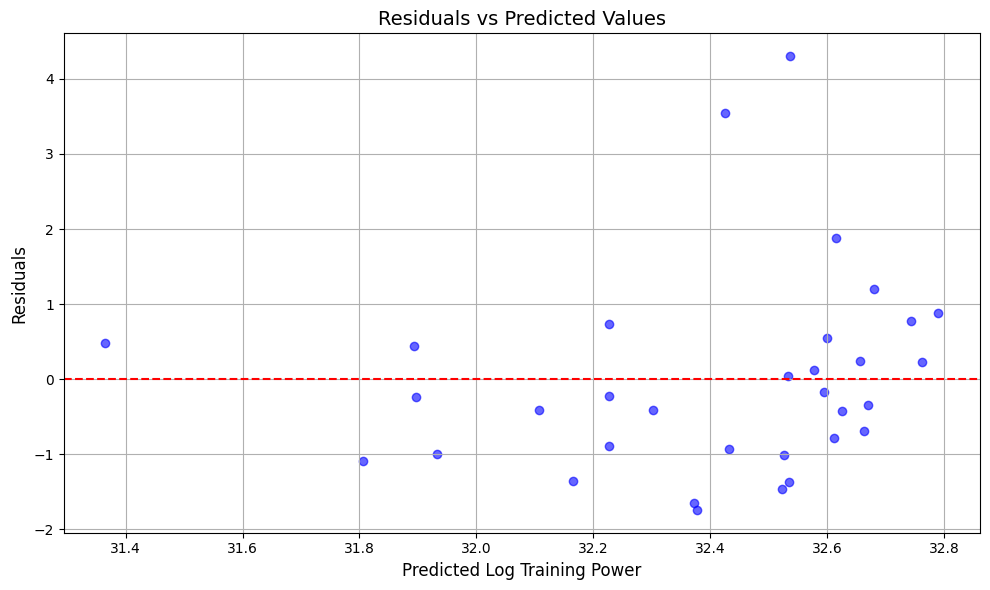

In [321]:
# Plot residuals
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')  # Zero residual line
plt.title('Residuals vs Predicted Values', fontsize=14)
plt.xlabel('Predicted Log Training Power', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()
